In [28]:
import numpy
import pandas
import matplotlib.pyplot as plt

5.1 Ihmisen iän ja pituuden välillä on selkeä lineaarinen riippuvuus. Erään ihmisen pituuksia on taulukoitu alla olevaan taulukkoon iän mukaan. Kumpi on selittävä ja kumpi selitettävä tilastomuuttuja? Muodosta taulukosta pistekaavio ja piirrä kuvion päälle regressiosuora.
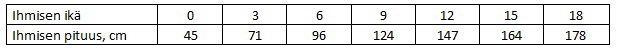

Selittävä on ikä ja selitettävä on pituus


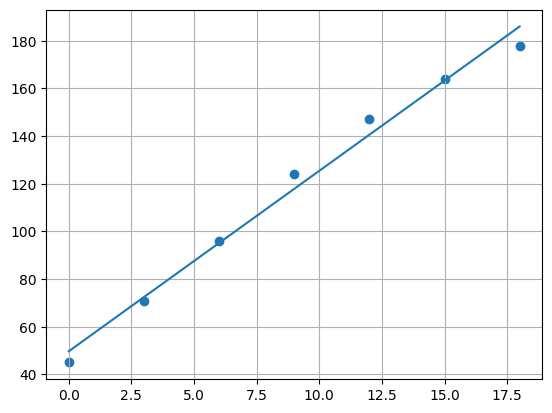

In [29]:
## Code here
print("Selittävä on ikä ja selitettävä on pituus")

humans_age_to_height = {0:45, 3:71, 6:96, 9:124, 12:147, 15:164, 18:178}

humans_age_to_height_df = pandas.DataFrame.from_dict(humans_age_to_height, orient='index', columns=['height'])
humans_age_to_height_df.index.name = 'age'

# lets create scatter plot
plt.scatter(humans_age_to_height_df.index, humans_age_to_height_df['height'])

# lets plot a linear regression line
plt.plot(numpy.unique(humans_age_to_height_df.index), numpy.poly1d(numpy.polyfit(humans_age_to_height_df.index, humans_age_to_height_df['height'], 1))(numpy.unique(humans_age_to_height_df.index)))

# add a grid to the plot
plt.grid()


5.2. Mikä on edellisen tehtävän regressiosuoran yhtälö? Mikä on sen kulmakerroin ja mikä on sen vakiotermi? Mistä nähdään, että kyseinen lineaarinen riippuvuus on positiivista? Kuinka monta senttiä tämä ihminen kasvoi vuodessa?

In [30]:
## Code here
# let's figure the function for the linear regression line
coefficents = numpy.polyfit(humans_age_to_height_df.index, humans_age_to_height_df['height'], 1)
regression_line = numpy.poly1d(coefficents)
print("Linear regression line: ", regression_line)

print("kulmakerroin: 7.571")
print("vakiotermi: 49.71")
print("riippuvuus on positiivista sillä kulmakerroin on positiivinen")
print("ihminen kasvoi vuodessa keskimäärin 7.571cm")



Linear regression line:   
7.571 x + 49.71
kulmakerroin: 7.571
vakiotermi: 49.71
riippuvuus on positiivista sillä kulmakerroin on positiivinen
ihminen kasvoi vuodessa keskimäärin 7.571cm


5.3 Alla olevassa taulukossa on miesten 100 metrin maailmanennätykset niiden vuosiluvun mukaan. Muodosta taulukosta pistekaavio ja määritä sille regressiosuora. Kumpi valitaan selittäväksi ja kumpi selitettäväksi tilastomuuttujaksi?
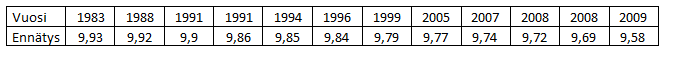

selittävä on vuosi ja selitettävä on aika


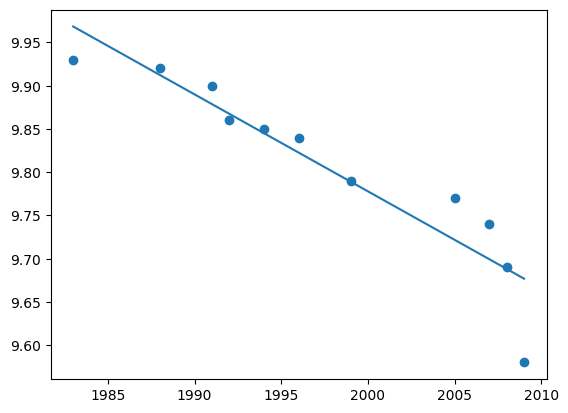

In [31]:
## Code here
print("selittävä on vuosi ja selitettävä on aika")
year_to_record100m = {1983:9.93, 1988:9.92, 1991:9.9, 1992:9.86, 1994:9.85, 1996:9.84, 1999:9.79, 2005:9.77, 2007:9.74, 2008:9.69 ,2009:9.58}

year_to_record100m_df = pandas.DataFrame.from_dict(year_to_record100m, orient='index', columns=['time'])
year_to_record100m_df.index.name = 'year'

# lets create scatter plot
plt.scatter(year_to_record100m_df.index, year_to_record100m_df['time'])

# lets plot a linear regression line
plt.plot(numpy.unique(year_to_record100m_df.index), numpy.poly1d(numpy.polyfit(year_to_record100m_df.index, year_to_record100m_df['time'], 1))(numpy.unique(year_to_record100m_df.index)))



5.4. Mikä on edellisen tehtävän regressiosuoran yhtälö? Mikä on sen kulmakerroin ja mikä on sen vakiotermi? Onko kyseinen lineaarinen riippuvuus positiivista vai negatiivista? Kuinka monta sekuntia maailmanennätys on parantunut keskimäärin vuodessa? Onko jokin piste mielestäsi kaukana suorasta?

In [32]:
## Code here
# lets figure the function for the linear regression line
coefficents = numpy.polyfit(year_to_record100m_df.index, year_to_record100m_df['time'], 1)
regression_line_speed = numpy.poly1d(coefficents)
print("Linear regression line: ", regression_line_speed)

print("kulmakerroin: -0.01121")
print("vakiotermi: 32.2")
print("riippuvuus on negatiivista sillä kulmakerroin on negatiivinen")
print("100m aika on vuosittain nopeutunut keskimäärin 0.01121s")
print("2009 on hieman liian kaukana muista arvoista, joten se on poikkeava arvo")

Linear regression line:   
-0.01121 x + 32.2
kulmakerroin: -0.01121
vakiotermi: 32.2
riippuvuus on negatiivista sillä kulmakerroin on negatiivinen
100m aika on vuosittain nopeutunut keskimäärin 0.01121s
2009 on hieman liian kaukana muista arvoista, joten se on poikkeava arvo


5.5 Jos oletamme tehtävän 5.1 lineaarisen mallin paikkansapitävyyden, kuinka pitkä ihminen olisi 30 vuotiaana, mikäli hän jatkaisi kasvuaan samaan tahtiin? Entä minkä ikäisenä hän oli 110 cm pitkä?

In [33]:
## Code here
def calculate_height(age):
    return regression_line(age)

def calculate_age(height):
    return (height - regression_line.coeffs[1]) / regression_line.coeffs[0]

print("Pituus 30 vuotiaana: ", calculate_height(30))

print("Ikä 110cm pituisena: ", calculate_age(110))

Pituus 30 vuotiaana:  276.8571428571428
Ikä 110cm pituisena:  7.9622641509434


### Keskiverto 100 vuotias regressio suoran periaatteella:
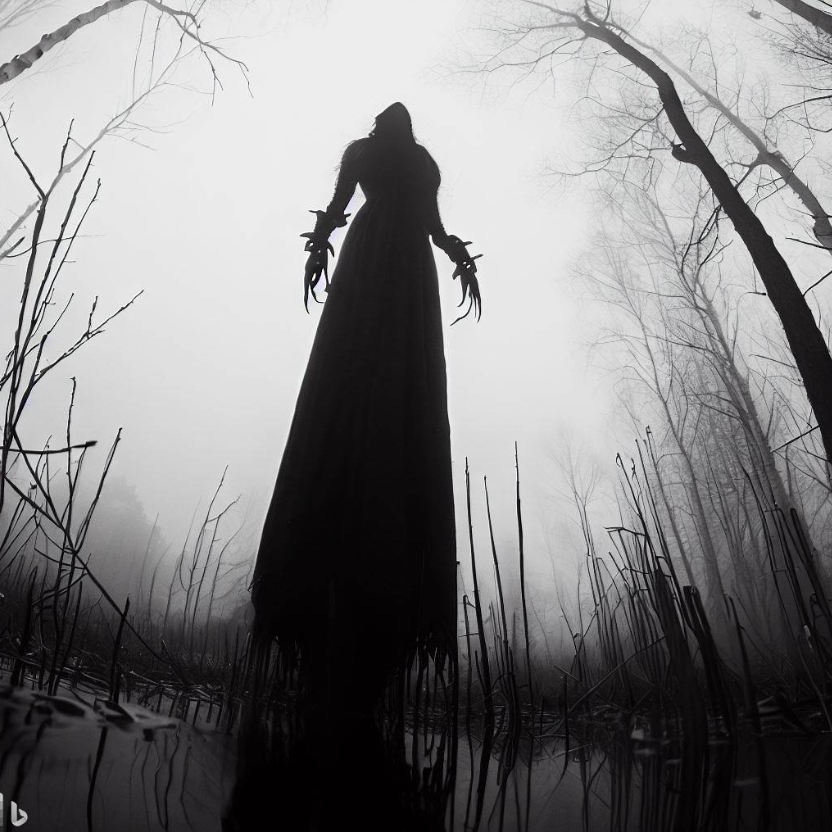

5.6 Jos oletamme tehtävän 5.3 lineaarisen mallin paikkansapitävyyden, mikä olisi 100 m maailmanennätys vuonna 2050, mikäli ennätys jatkaisi paranemistaan samaan tahtiin? Minä vuonna maailmanennätys oli 10,4? Oikeasti maailmanennätys oli 10,4 sekuntia vuonna 1921.

In [34]:
## Code here
def calculate_record(year):
    return regression_line_speed(year)

def calculate_year(record):
    return (record - regression_line_speed.coeffs[1]) / regression_line_speed.coeffs[0]

print("100m aika vuonna 2050: ", calculate_record(2050))

print("Vuosi jolloin 100m aika oli 10.4s: ", calculate_year(10.4))

100m aika vuonna 2050:  9.217174877422334
Vuosi jolloin 100m aika oli 10.4s:  1944.5124414367565
